<a href="https://colab.research.google.com/github/RanajayBiswas/Play-Store-App-Review-Analysis-EDA-Project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

### **First things first** :



In [1]:
# importing the helps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Getting to know our first data set ---> Play Store Dataset**



In [3]:
# reading the playstore apps data set
df = pd.read_csv('/content/drive/MyDrive/Projects Almabetter/EDA Project on Google Playstore Dataset/Play Store Data.csv')

In [4]:
# making a copy of the main dataframe for furthur use
playstore_df = df.copy()

In [5]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# checking the cols
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# checking the shape
playstore_df.shape

(10841, 13)

In [8]:
# getting idea of the data types present
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# checking for initial numerical variables
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


So, right now we only have one column with numerical value which is the Rating column

In [10]:
# understanding which columns has what number of null values
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## The Cleansing and the filling process begins --->

---



---



### Starting with the ---> Rating column

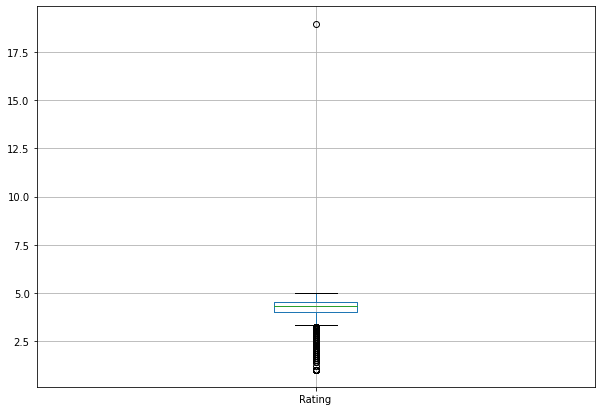

In [11]:
playstore_df.boxplot(figsize = (10,7))

# plt.show

It seems like we have one outlier

---



### Let's get rid of the outlier and the nonsense values.
As, there should not be any value above 5.0 and less than 1.0, so, we will first check how many rows we have with rating more than 5.0 and less than 1.0

In [12]:
playstore_df[(playstore_df['Rating']> 5.0) | (playstore_df['Rating']< 1.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So, we only have one such row. Let's just drop the row to keep the authenticity of the data set

In [13]:
# dataframe with all the rows except that one row with nonsensical rating value
playstore_df.drop(playstore_df[(playstore_df['Rating']> 5.0) | (playstore_df['Rating']< 1.0)].index, inplace= True)


In [14]:
playstore_df[10469:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


We had one outlier, let's check the skewness now

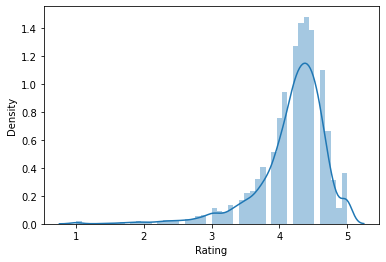

In [15]:
# playstore_df.plot(kind = 'density')
sns.distplot(playstore_df.Rating)

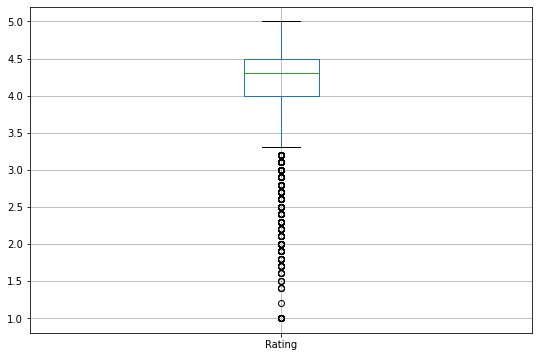

In [16]:
playstore_df.boxplot(figsize = (9,6))

In [17]:
playstore_df.shape

(10840, 13)

###  As our data is left skewed and seems to be most of the values lie within 4.0 to 4.5
So, we are going to use the median to fill the null values in the ratings columns with

In [18]:
# fill all the rows where the rating col value is null
playstore_df['Rating'].fillna(float(playstore_df['Rating'].median()), inplace=True)


In [19]:
# let's see the null values again
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### Next we have Type, Current version and Android version columns to work on
These columns have categorical data. So, we are going to choose mode for replacing the na values values in those columns

In [20]:
# first checking the modes ----->
Curr_ver_mode  = playstore_df['Current Ver'].mode()
print(Curr_ver_mode)
Android_ver_mode  = playstore_df['Android Ver'].mode()
print(Android_ver_mode)
app_type = playstore_df['Type'].mode()
print(app_type)

0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Free
dtype: object


In [21]:
# replacing null values with the modes --->
playstore_df['Current Ver'].fillna(str(playstore_df['Current Ver'].mode()), inplace=True)

playstore_df['Android Ver'].fillna(str(playstore_df['Android Ver'].mode()), inplace=True)

playstore_df['Type'].fillna(str(playstore_df['Type'].mode()), inplace=True)

In [22]:
# making sure we got rid of all the null values
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
playstore_df.shape

(10840, 13)

## So, we have removed all the null values from our data set...

## But the challenge that stands before us now is that some of the columns technically should be numerical and need to be numerical, So that we get the preferred results...

In [24]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## It initially looks like Reviews, Installs and Price columns are categorical. Whereas, we need them to be numerical to do visualizations. So, let's check what's the situation here --->

### For 'Price' column :

In [25]:
# checking the unique values in the price column
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

###The problem is that we are having 'dollar' sign infront of the values which are not 0 in our 'Price' column.
Let's get rid of the dollar sign , and make the str values into float type ---->

In [26]:
# applying lambda function to replace '$' with nothing, and then convert str to numerical
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

playstore_df['Price'] = playstore_df['Price'].apply(lambda x: float(x))


### Dealing with the Reviews column next.

In [27]:
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'],errors='coerce')

###Installs column seems to have ',' and '+' sign assosiated with the values.
So, we need to remove them and then make them numeric

In [28]:
# getting rid of '+' and ',' in Installs column and converting them to numeric values
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'],errors='coerce')

In [29]:
playstore_df.shape

(10840, 13)

### Let's check if our columns turned numeric or not

In [30]:
playstore_df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [31]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [32]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Our dataset is now all set to do visualizations. 
## So, let's get started with some visualisatons ----->
### To have a perfect sense of what insights our data can give, we need to group our dataframe by Category and then we can see the correalation of category with rating, reviews and price etc..

In [33]:
# grouping by category ---->
category_df = playstore_df.groupby('Category')

### Category and Rating correlation graph

In [34]:
# average rating category wise ----> 
rating_category = category_df['Rating'].agg(np.mean)
print(rating_category)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

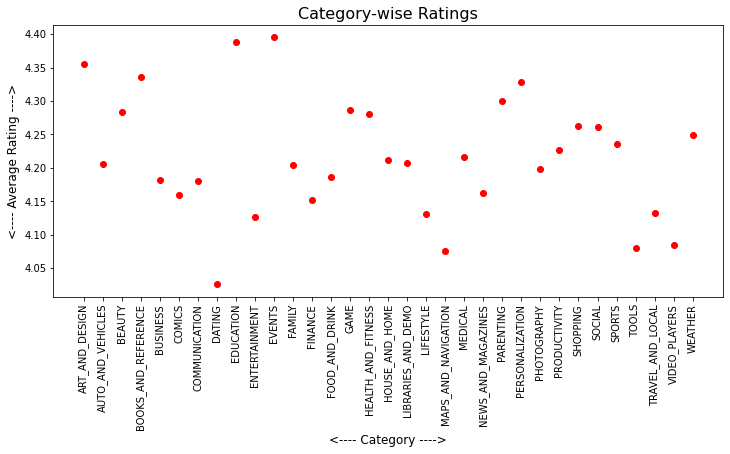

In [35]:
# plotting Categorywise Rating graph ----->
plt.figure(figsize=(12, 5))
plt.plot(rating_category, 'ro')
plt.xticks(rotation = 90)
plt.title('Category-wise Ratings', fontsize=16)
plt.xlabel('<---- Category ---->', fontsize=12)
plt.ylabel('<---- Average Rating ---->', fontsize=12)
plt.show()

### *From the above plot, we can say that apps with the highest average rating in the dataset falls into the category of -*

1. EVENTS
2. EDUCATION
3. ART_AND_DESIGN  

### *The lowest rated apps have been --->*  DATING apps



### Category and reviews correlation plotting :

In [36]:
# average no. of review category wise ----> 
review_category = category_df['Reviews'].agg(np.mean)
print(review_category)

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

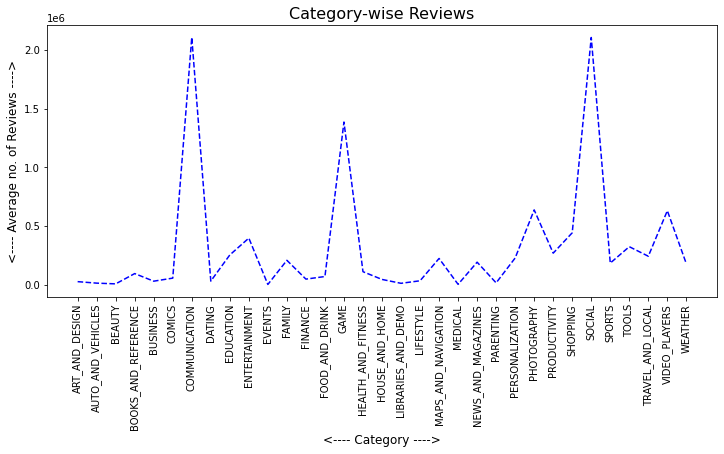

In [37]:
# plotting Categorywise Review graph ----->
plt.figure(figsize=(12, 5))
plt.plot(review_category, 'r--', color= 'b')
plt.xticks(rotation = 90)
plt.title('Category-wise Reviews', fontsize=16)
plt.xlabel('<---- Category ---->', fontsize=12)
plt.ylabel('<---- Average no. of Reviews ---->', fontsize=12)
plt.show()

### Whereas, Communication and Social apps have had the highest no. of reviews under their belt even though they have somewhat of an average rating among all the categories.

### Category Wise Installations :

In [38]:
# average Install category wise ----> 
Install_category = category_df['Installs'].agg(np.mean)
print(Install_category)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

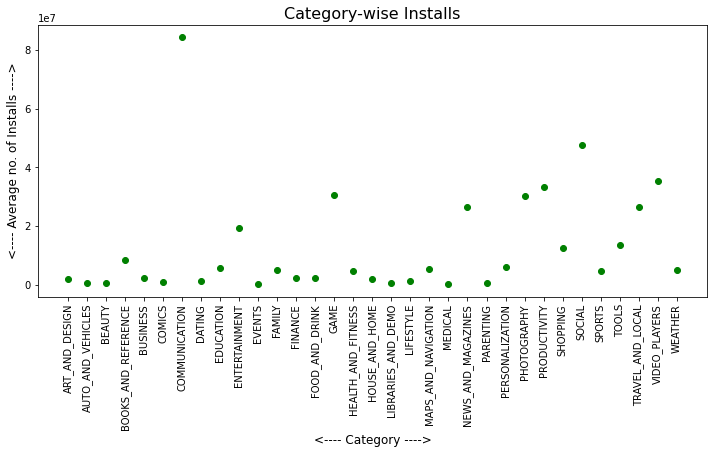

In [39]:
# plotting Categorywise Installs graph ----->
plt.figure(figsize=(12, 5))
plt.plot(Install_category, 'go') #color= 'b')
plt.xticks(rotation = 90)
plt.title('Category-wise Installs', fontsize=16)
plt.xlabel('<---- Category ---->', fontsize=12)
plt.ylabel('<---- Average no. of Installs ---->', fontsize=12)
plt.show()

### Communication apps also have the highest number of Installs. A lot more than any other category. Followed by, Social apps. 
### These two apps categories also have the highest number of reviews. 

### Apps in each Category:

In [40]:
# Number of apps category wise ----> 
Install_category_series = category_df['App'].count()

In [41]:
Install_category2 = Install_category_series.to_frame()

In [42]:
Install_category2.reset_index(inplace=True)

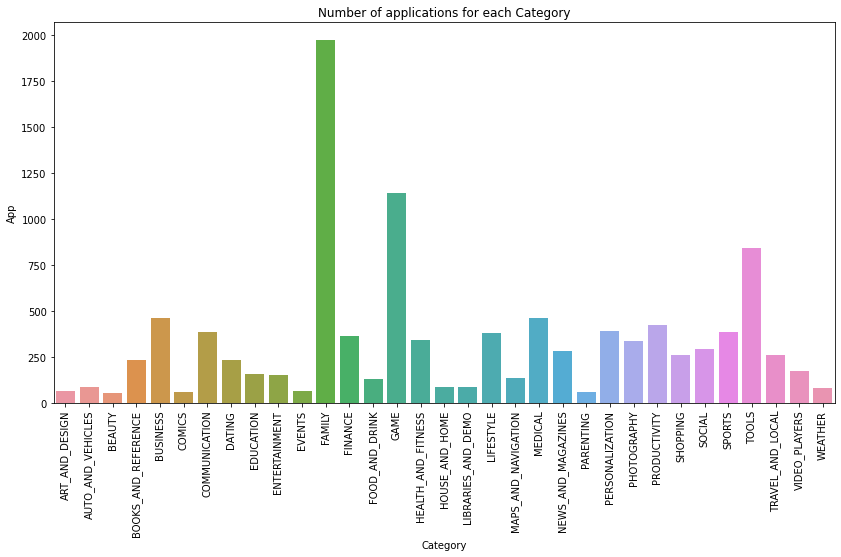

In [43]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("App")
plt.title("Number of applications for each Category")
sns.barplot(Install_category2.Category, Install_category2.App)
plt.show()

### Our dataset consists of most number of applications from the category -   'Family', followed by 'Game' & 'Tools' apps.

### Category-wise Prices graph 

In [44]:
# Category wise Prices ----> 
price_category_series = category_df['Price'].agg(np.sum)

In [45]:
price_category_df = price_category_series.to_frame().reset_index()

In [46]:
price_category_df.columns = ['Category', 'Price']

In [47]:
price_category_df

,Category,Price
0,ART_AND_DESIGN,5.97
1,AUTO_AND_VEHICLES,13.47
2,BEAUTY,0.00
3,BOOKS_AND_REFERENCE,119.77
4,BUSINESS,185.27
5,COMICS,0.00
6,COMMUNICATION,83.14
7,DATING,31.43
8,EDUCATION,17.96
9,ENTERTAINMENT,7.98


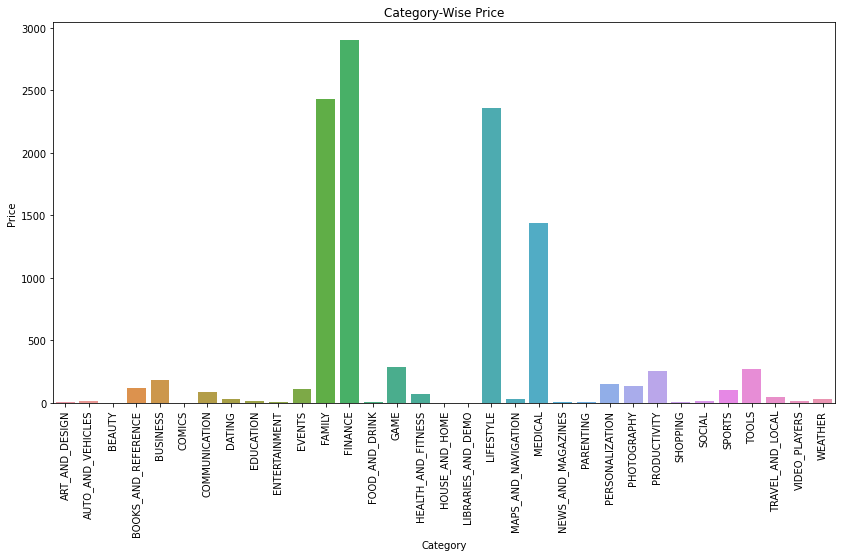

In [65]:
# Plotting category wise Prices graph
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Price")
plt.title("Category-Wise Price")
sns.barplot(price_category_df.Category, price_category_df.Price)
plt.show()

### Finance, Family, Lifestyle and Medical apps have charged the most amount of money among all the the categories. 
### These apps have been purchased and used by less users and have low number of reviews with ratings somewhere between 4.1 to 4.25 

# ***Getting to know our second data set --- User Reviews data set***

In [49]:
# reading the user reviews data set
reviews_df = pd.read_csv('/content/drive/MyDrive/Projects Almabetter/EDA Project on Google Playstore Dataset/User Reviews.csv')

In [50]:
reviews_df[198:208]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
198,10 Best Foods for You,Nothing special! Could find anything useful!,Positive,0.410714,0.285714
199,10 Best Foods for You,Its ok I love ok.,Positive,0.500000,0.533333
200,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000
201,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,nice,Positive,0.600000,1.000000
202,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Almost mobile phone,Neutral,0.000000,0.000000
203,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Very effective, efficient convenient find avai...",Positive,0.626667,0.666667
204,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Easy intuitive,Positive,0.433333,0.833333
205,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,good searching job internship,Positive,0.700000,0.600000
206,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Not bad, price little bit expensive",Negative,-0.112500,0.622222
207,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,easy use!,Positive,0.541667,0.833333


In [51]:
reviews_df.shape

(64295, 5)

In [52]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [53]:
reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [54]:
# understanding which columns has what number of null values
reviews_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [55]:
reviews_df.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


### It looks like there are many rows with columns which have only apps name in them and don't have any other column value. As we don't know about the customer responses, we have to drop all the these rows.
 

In [56]:
# dropping the null values
reviews_df.dropna(axis= 0, inplace=True)
reviews_df.shape

(37427, 5)

In [57]:
# checking the null values again
reviews_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

## **Visualization :**

### Grouping by App name --->

In [58]:
# grouping by Apps ---->
app_df = reviews_df.groupby('App')

### Visualizing which apps have been reviewed the most 

In [59]:
app_review_count = app_df['Translated_Review'].count()
print(app_review_count.sort_values(ascending = False))

App
Bowmasters                        312
Angry Birds Classic               273
Helix Jump                        273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
HD Camera                           1
Discover Mobile                     1
Draw A Stickman                     1
Draw In                             1
Fruit Block - Puzzle Legend         1
Name: Translated_Review, Length: 865, dtype: int64


In [60]:
# slicing the row for the top 20 apps with most reviews ----->
x = app_review_count.sort_values(ascending = False).iloc[:20]

In [ ]:
top_review_app_df = x.to_frame().reset_index()

In [ ]:
top_review_app_df.columns = ['Reviews', 'App']

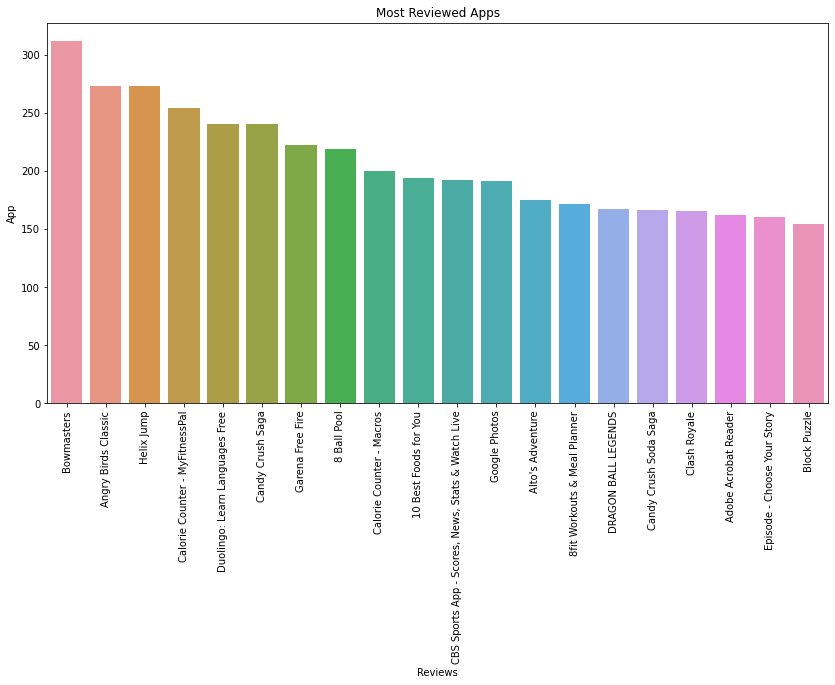

In [ ]:
# Plotting the graph
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Reviews")
plt.ylabel("App")
plt.title("Most Reviewed Apps")
sns.barplot(top_review_app_df.Reviews, top_review_app_df.App)
plt.show()

### Top 3 apps that have the highest reviews are --


1. Bowmasters
2. Angry Birds Classic
3. Helix Jump


### Visualizing the apps that have the most positive sentiment or reviews

In [62]:
# taking a dataframe where all the sentiment of users are positive
pos_df= reviews_df[reviews_df['Sentiment'] == 'Positive']

# grouping by app name
p = pos_df.groupby('App')

In [63]:
# sorting by the no. of positive sentiment reviewed apps (highest to lowest) and taking the top 20
most_positive_apps = p['Sentiment'].count().sort_values(ascending= False).iloc[:20]
most_positive_apps

App
Helix Jump                                           209
Duolingo: Learn Languages Free                       200
Calorie Counter - Macros                             174
Bowmasters                                           169
Calorie Counter - MyFitnessPal                       169
10 Best Foods for You                                162
Google Photos                                        143
8fit Workouts & Meal Planner                         137
Garena Free Fire                                     136
DRAGON BALL LEGENDS                                  127
Angry Birds Classic                                  124
CBS Sports App - Scores, News, Stats & Watch Live    123
ColorNote Notepad Notes                              121
Calorie Counter - MyNetDiary                         120
Adobe Acrobat Reader                                 119
Calorie Counter & Diet Tracker                       109
Clash Royale                                         107
Crunchyroll - Everything An

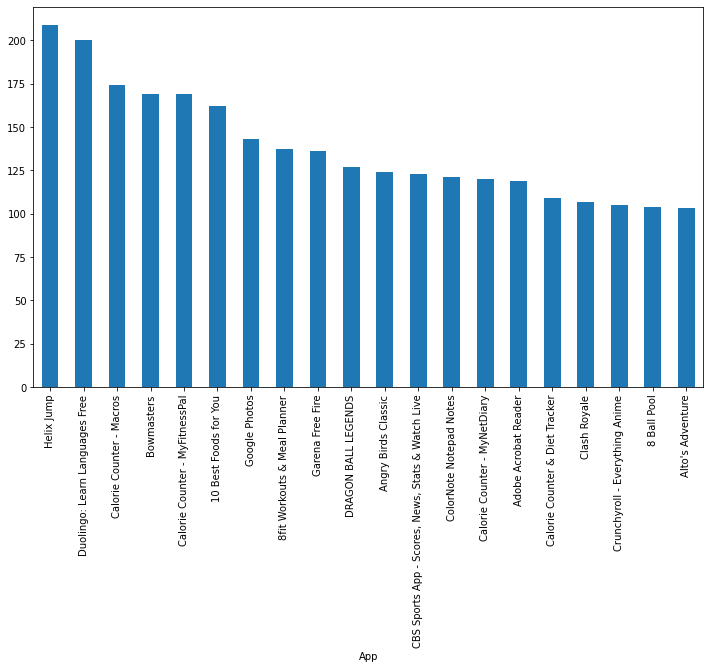

In [64]:
most_positive_apps.plot(kind='bar', figsize= (12,7))

* Helix Jump 
* Duolingo: Learn Languages Free
* Calorie Counter - Macros
### Top 3 apps with the most no. of positive user sentiments
